# Negation

In [1]:
from qualtran import Bloq, CompositeBloq, BloqBuilder, Signature, Register
from qualtran import QBit, QInt, QUInt, QAny
from qualtran.drawing import show_bloq, show_call_graph, show_counts_sigma
from typing import *
import numpy as np
import sympy
import cirq

## `Negate`
Compute the two's complement negation for a integer/fixed-point value.

This bloq is equivalent to the "Unary minus" [1] C++ operator.
- For a signed `x`, the output is `-x`.
- For an unsigned `x`, the output is `2^n - x` (where `n` is the bitsize).

This is computed by the bit-fiddling trick `-x = ~x + 1`, as follows:
1. Flip all the bits (i.e. `x := ~x`)
2. Add 1 to the value (interpreted as an unsigned integer), ignoring
   any overflow. (i.e. `x := x + 1`)

For a controlled negate bloq: the second step uses a quantum-quantum adder by
loading the constant (i.e. 1), therefore has an improved controlled version
which only controls the constant load and not the adder circuit, hence halving
the T-cost compared to a controlled adder.

#### Parameters
 - `dtype`: The data type of the input value. 

#### Registers
 - `x`: Any unsigned value or signed value (in two's complement form). 

#### References
 - [Arithmetic Operators - cppreference](https://en.cppreference.com/w/cpp/language/operator_arithmetic). Operator "Unary Minus". Last accessed 17 July 2024.


In [2]:
from qualtran.bloqs.arithmetic import Negate

### Example Instances

In [3]:
negate = Negate(QInt(8))

In [4]:
import sympy

n = sympy.Symbol("n")
negate_symb = Negate(QInt(n))

#### Graphical Signature

In [5]:
from qualtran.drawing import show_bloqs
show_bloqs([negate, negate_symb],
           ['`negate`', '`negate_symb`'])

### Call Graph

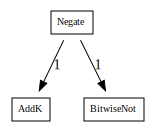

#### Counts totals:
 - `AddK`: 1
 - `BitwiseNot`: 1

In [6]:
from qualtran.resource_counting.generalizers import ignore_split_join
negate_g, negate_sigma = negate.call_graph(max_depth=1, generalizer=ignore_split_join)
show_call_graph(negate_g)
show_counts_sigma(negate_sigma)